# Spaceship Titanic Science Solutions

## Feature Engineering

1.load packages<br>
2.Load Data<br>
3.Feature Engineering 

# Import Packages

In [112]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# load Data

In [113]:
train = pd.read_csv("train.csv")

In [114]:
test = pd.read_csv("test.csv")

In [115]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Feature Engineering

In [116]:
train.shape

(8693, 14)

In [117]:
test.shape

(4277, 13)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [120]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


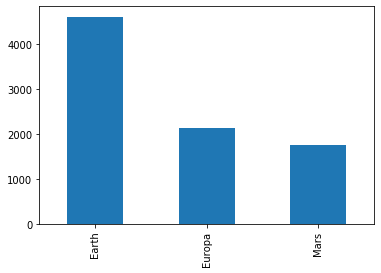

In [121]:
train['HomePlanet'].value_counts().plot.bar()

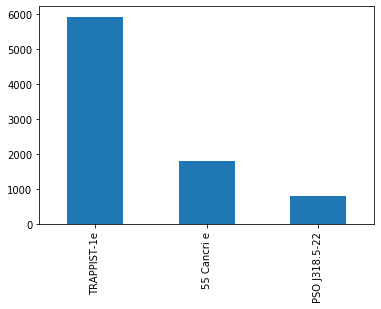

In [122]:
train['Destination'].value_counts().plot.bar()

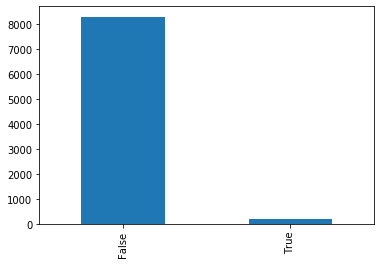

In [123]:
train['VIP'].value_counts().plot.bar()

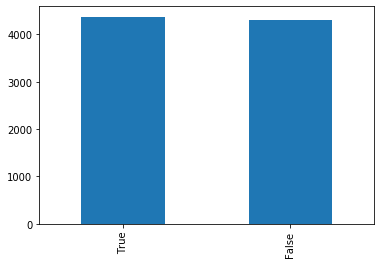

In [124]:
train['Transported'].value_counts().plot.bar()

In [125]:
train.Cabin.duplicated().sum() 
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,6694_01,Earth,False,G/734/S,TRAPPIST-1e,False,Asch Stradick
freq,1,4602,5439,8,5915,8291,2


In [126]:
train.nunique().sort_values(ascending=False)

PassengerId     8693
Name            8473
Cabin           6560
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
Destination        3
HomePlanet         3
Transported        2
VIP                2
CryoSleep          2
dtype: int64

In [127]:
train[['CryoSleep','Transported']].groupby(['CryoSleep'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [128]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], 
                                                as_index=False).mean().sort_values(by='Transported', ascending=False)


,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [129]:
train[['Cabin','Transported']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,Cabin,Transported
6559,T/3/P,1.0
2004,E/513/S,1.0
4581,G/1012/P,1.0
4580,G/1011/S,1.0
2008,E/516/P,1.0
...,...,...
4263,F/797/P,0.0
4264,F/797/S,0.0
2295,F/1077/P,0.0
2291,F/1075/P,0.0


In [130]:
train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [131]:
train[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


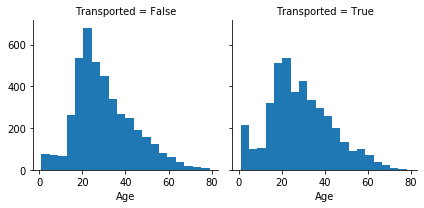

In [132]:
u1 = sns.FacetGrid(train[train['Age'] > 0], col='Transported')
u1.map(plt.hist, 'Age', bins=20)

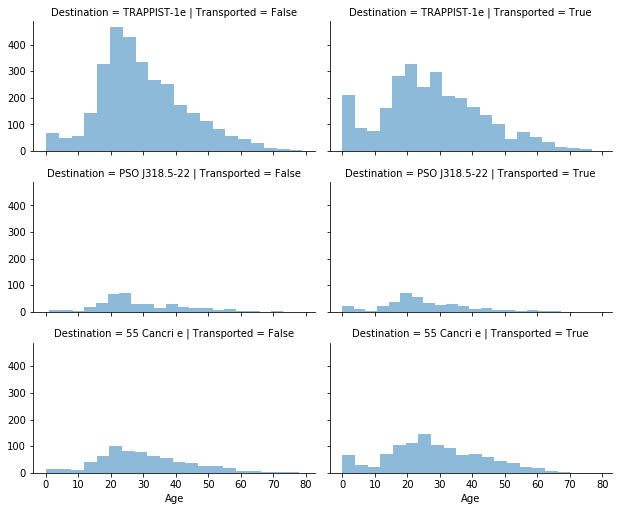

In [58]:
grid = sns.FacetGrid(train, col='Transported', row='Destination', height=2.4, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [133]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


C:\Users\ahina\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ahina\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


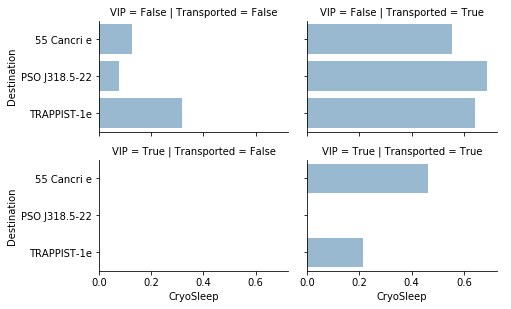

In [134]:
grid = sns.FacetGrid(train, row='VIP', col='Transported', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'CryoSleep', 'Destination', alpha=.5, ci=None)
grid.add_legend()

In [135]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)

In [136]:
train[['deck', 'num','side']] = train['Cabin'].str.split('/', expand=True)
train=train.drop(['Cabin'],axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [137]:
test[['deck', 'num','side']] = test['Cabin'].str.split('/', expand=True)
test=test.drop(['Cabin'],axis=1)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [138]:
train.nunique().sort_values(ascending=False)


num             1817
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
deck               8
Destination        3
HomePlanet         3
side               2
Transported        2
VIP                2
CryoSleep          2
dtype: int64

In [139]:
train['deck'].value_counts()


F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [140]:
train['deck'].unique().tolist()


['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T']

In [141]:
train['deck']=train['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
train['deck'].value_counts()

5.0    2794
6.0    2559
4.0     876
1.0     779
2.0     747
3.0     478
0.0     256
7.0       5
Name: deck, dtype: int64

In [142]:
test['deck']=test['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
test['deck'].value_counts()

5.0    1445
6.0    1222
4.0     447
1.0     362
2.0     355
3.0     242
0.0      98
7.0       6
Name: deck, dtype: int64

In [143]:
train['side'].unique().tolist()


['P', 'S', nan]

In [144]:
train['side']=train['side'].replace({'P':0, 'S':1})
train['side'].value_counts()

1.0    4288
0.0    4206
Name: side, dtype: int64

In [145]:
test['side'].unique().tolist()

['S', 'P', nan]

In [146]:
test['side']=test['side'].replace({'P':0, 'S':1})
test['side'].value_counts()

1.0    2093
0.0    2084
Name: side, dtype: int64

In [147]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,6.0,3,1.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,5.0,4,1.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,2.0,1,1.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,5.0,5,1.0


In [148]:
train['HomePlanet'].unique().tolist()

['Europa', 'Earth', 'Mars', nan]

In [149]:
train['HomePlanet']=train['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
train['HomePlanet'].value_counts()

1.0    6361
0.0    2131
Name: HomePlanet, dtype: int64

In [150]:
test['HomePlanet']=test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
test['HomePlanet'].value_counts()

1.0    3188
0.0    1002
Name: HomePlanet, dtype: int64

In [151]:
train['Destination'].unique().tolist()


['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]

In [152]:
train['Destination']=train['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
train['Destination'].value_counts()

0.0    5915
2.0    1800
1.0     796
Name: Destination, dtype: int64

In [153]:
test['Destination']=test['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test['Destination'].value_counts()

0.0    2956
2.0     841
1.0     388
Name: Destination, dtype: int64

In [154]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0.0,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,0,0.0
1,1.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5.0,0,1.0
2,0.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,1.0
3,0.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0,1.0
4,1.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.0,1,1.0


In [155]:
train[['CryoSleep', 'VIP','Transported']] = (train[['CryoSleep', 'VIP','Transported']] == True).astype(int)
test[['CryoSleep', 'VIP']] = (test[['CryoSleep', 'VIP']] == True).astype(int)
train.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
8688,0.0,0,2.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,98,0.0
8689,1.0,1,1.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6.0,1499,1.0
8690,1.0,0,0.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6.0,1500,1.0
8691,0.0,0,2.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4.0,608,1.0
8692,0.0,0,0.0,44.0,0,126.0,4688.0,0.0,0.0,12.0,1,4.0,608,1.0


In [156]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
ShoppingMall,208
HomePlanet,201
side,199
num,199
deck,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182


In [157]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test = test.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train.isnull().sum() != 0)

0

In [158]:
X_train = train.drop("Transported", axis=1)
Y_train = train["Transported"]
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((8693, 12), (8693,), (4277, 12))

In [159]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\ahina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


78.83

In [160]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Destination,1.700635
11,side,0.810607
2,Age,0.227944
4,RoomService,0.003629
7,Spa,0.000659
6,ShoppingMall,0.000553
5,FoodCourt,-0.001226
8,VRDeck,-0.001534
9,Transported,-0.001542
3,VIP,-0.003908


In [161]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.56

In [167]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.19

In [168]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.16

In [169]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.16

In [170]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.16
4,Decision Tree,95.16
1,KNN,84.19
2,Logistic Regression,78.83
0,Support Vector Machines,78.56


In [174]:
sol=pd.read_csv('sample_submission.csv')
sol['Transported']=Y_pred
sol.head()
sol.to_csv('submission.csv',index=False)

In [175]:
chk=pd.read_csv('submission.csv')

In [176]:
chk.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [183]:
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.0+ KB


In [184]:
chk['PassengerId'].apply(int)

0         1301
1         1801
2         1901
3         2101
4         2301
         ...  
4272    926602
4273    926901
4274    927101
4275    927301
4276    927701
Name: PassengerId, Length: 4277, dtype: int64

In [186]:
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.0+ KB


In [188]:
chk['Transported']=chk['Transported'].replace({0:False, 1:True})
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [189]:
chk.to_csv('submission999.csv',index=False)